In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
# Run this cell and the next one instead of the first and fourth cells to access the DJI csv file from your local files rather than drive 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving ^dji_d.csv to ^dji_d.csv


In [0]:
dji = pd.read_csv('^dji_d.csv', index_col=0)

## Impact of 1956-58 Asian Flu and 1968 Flu Pandemic on the Dow and Jones Industrial Average

I've taken the historic data for the DJI from 1896 to 2020 from https://stooq.com/q/d/?s=^dji.

It is commonly accepted that the DJI roughly follows market trends and thus is a good indicator of the status of the economy at a given time period. However, I am unsure if this holds true for dates closer to its inception - this may need validation.

In [0]:
#Storing the file in my Drive, after mounting import as dataframe
dji = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dji_historic.csv', index_col=0)

FileNotFoundError: ignored

In [3]:
#Inspect
print(dji.head(10))

#Check if Date was imported as datetime or object
print(dji.index.dtype)

             Open   High    Low  Close  Volume
Date                                          
1896-05-27  29.39  29.39  29.39  29.39     NaN
1896-05-28  29.11  29.11  29.11  29.11     NaN
1896-05-29  29.43  29.43  29.43  29.43     NaN
1896-06-01  29.40  29.40  29.40  29.40     NaN
1896-06-02  29.00  29.00  29.00  29.00     NaN
1896-06-03  28.80  28.80  28.80  28.80     NaN
1896-06-04  28.93  28.93  28.93  28.93     NaN
1896-06-05  29.20  29.20  29.20  29.20     NaN
1896-06-08  28.83  28.83  28.83  28.83     NaN
1896-06-09  28.49  28.49  28.49  28.49     NaN
object


In [4]:
#Convert index to datetime
dji.index = pd.to_datetime(dji.index)
print(dji.index.dtype)
dji.index

datetime64[ns]


DatetimeIndex(['1896-05-27', '1896-05-28', '1896-05-29', '1896-06-01',
               '1896-06-02', '1896-06-03', '1896-06-04', '1896-06-05',
               '1896-06-08', '1896-06-09',
               ...
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-11', '2020-05-12'],
              dtype='datetime64[ns]', name='Date', length=32128, freq=None)

with the dataset imported, we see that we have 5 features - Open, High, Low, Close and Volume - but it seems Volume wasn't being tracked at the start.

Let's see when volume becomes a usable feature

In [5]:
dji.Volume = dji.Volume.fillna(-1)  #Dummy value
dji[dji.Volume != -1]

Open      High       Low     Close       Volume
Date                                                           
1930-02-03    268.40    271.50    264.80    266.50     857143.0
1930-02-04    266.50    270.00    264.40    268.50     728571.0
1930-02-05    268.90    274.00    268.90    272.10     983459.0
1930-02-06    272.10    273.60    267.00    268.60     836842.0
1930-02-07    268.60    271.60    265.40    267.80     764662.0
...              ...       ...       ...       ...          ...
2020-04-30  24585.57  24585.57  24186.90  24345.72  145377145.0
2020-05-01  24120.78  24120.78  23645.30  23723.69  102265543.0
2020-05-04  23581.55  23769.56  23361.16  23749.76   85218362.0
2020-05-11  24256.45  24366.21  24070.22  24221.99  345546681.0
2020-05-12  24292.84  24382.09  23761.58  23764.78  350548213.0

[23676 rows x 5 columns]

I want to capture the main trends of the DJI and not be overwhelmed with the day-to-day volatility that is commonly present in time-series data especially with market data. As such, I'll convert the High,Low and Volume features to a simple moving average with a 2 week window.

In [6]:
#Create simple moving average features for smoother plots
dji['High_SMA'] = dji.loc[:,['High']].rolling(window=14).mean()
dji['Low_SMA'] = dji.loc[:,['Low']].rolling(window=14).mean()
dji['Volume_SMA'] = dji.loc[:,['Volume']].rolling(window=14).mean()

dji.head()

Open   High    Low  Close  Volume  High_SMA  Low_SMA  Volume_SMA
Date                                                                         
1896-05-27  29.39  29.39  29.39  29.39    -1.0       NaN      NaN         NaN
1896-05-28  29.11  29.11  29.11  29.11    -1.0       NaN      NaN         NaN
1896-05-29  29.43  29.43  29.43  29.43    -1.0       NaN      NaN         NaN
1896-06-01  29.40  29.40  29.40  29.40    -1.0       NaN      NaN         NaN
1896-06-02  29.00  29.00  29.00  29.00    -1.0       NaN      NaN         NaN

It seems like the first case of Volume reporting was in 1930. It also seems, from the last couple of values, that there may be missing data throughout. Nevertheless, it seems that we can use Volume for the time periods of interest.

Let's visualize a couple of the features for the time periods of interest

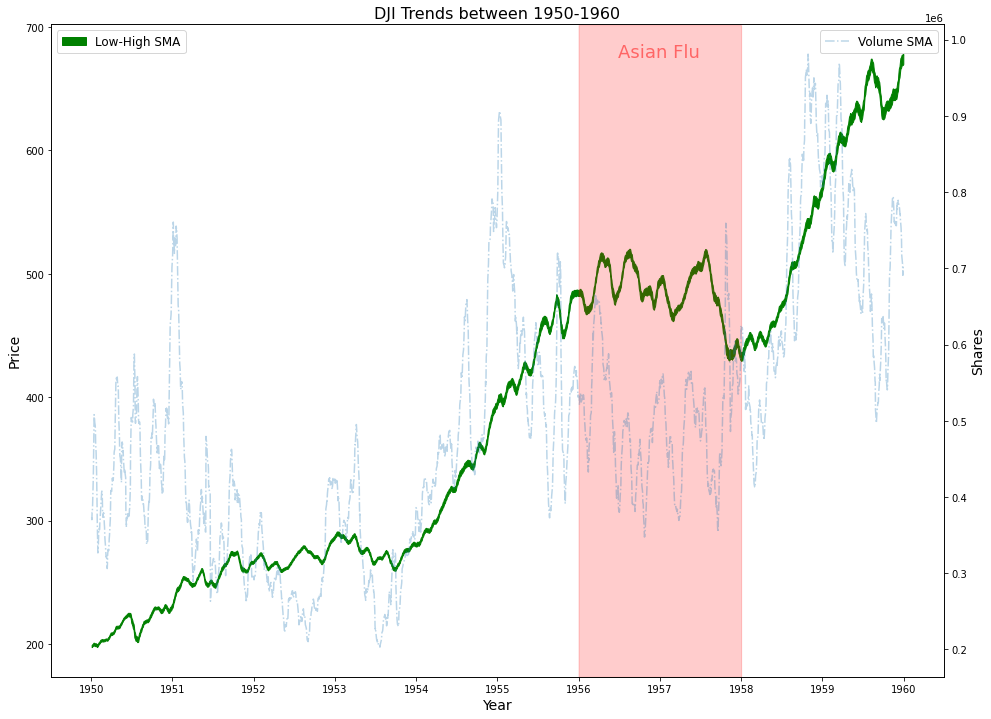

In [7]:
#Asian Flu - 1956-1958

time_window = 10 #years

#Start with 1950 - 1960
start_year = 1950
end_year = start_year+time_window

#Generate years between start and end
years = np.arange(start_year, end_year)

#Filter all rows not in those years
dji_window = dji[dji.index.year.isin(years)]

#Create plot
fig,ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')  #Used for dark mode

#We could use df.plot to plot, but since volume is at a much higher scale,
#do it in matplotlib instead

#If we plot open, close, low and high, they all seem to line up becase the scale
#of the differences between them is much smaller than day to day variations,
#so I'll just plot high and low
ax.fill_between(dji_window.index, dji_window.Low_SMA, dji_window.High_SMA, label='Low-High SMA', color='g')
plt.legend(loc='upper left', fontsize=12)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Price', fontsize=14)

#Plot the volume on a seperate y-axis because of scale
ax_vol = ax.twinx()
ax_vol.plot(dji_window.Volume_SMA, linestyle='-.', label='Volume SMA', alpha=0.3)
ax_vol.set_ylabel('Shares', fontsize=14)
plt.legend(fontsize=12)

#We are interested in 1956-1958, I'll highlight that area
y_min, y_max = ax.get_ylim()
ax.fill_betweenx(np.arange(y_min, y_max),np.datetime64('1956'), np.datetime64('1958'), color='r',alpha=0.2)
ax.text(0.635,0.95, "Asian Flu", fontsize=18, color='r', alpha=0.5, transform=ax.transAxes)
ax.set_ylim(y_min, y_max) #Plotting the area changes the ylims, so reset them


plt.title('DJI Trends between %i-%i' %(start_year, end_year), fontsize=16)
plt.savefig('dji_trend_asian_flu.png')
plt.show()

We see that after a period of 2/3 years of economic growth from mid 1953 to 1956, there is a period of uncertainty and turbulence and a sharp decline late 1957. Without any further evidence it is difficult to say if this is a direct result of the pandemic.

Lets look at the 1968 Flu

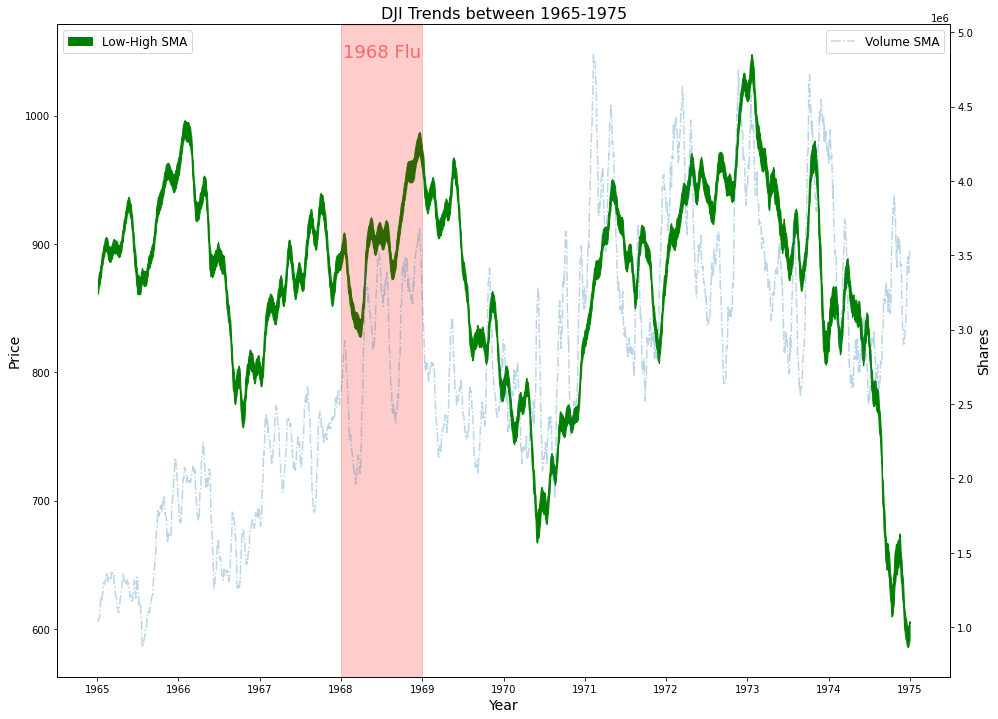

In [0]:
#1968 Flu

time_window = 10 #years

#Start with 1965 - 1975
start_year = 1965
end_year = start_year+time_window

#Generate years between start and end
years = np.arange(start_year, end_year)

#Filter all rows not in those years
dji_window = dji[dji.index.year.isin(years)]

#Create plot
fig,ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')  #Used for dark mode

#We could use df.plot to plot, but since volume is at a much higher scale,
#do it in matplotlib instead

#If we plot open, close, low and high, they all seem to line up becase the scale
#of the differences between them is much smaller than day to day variations,
#so I'll just plot high and low
ax.fill_between(dji_window.index, dji_window.Low_SMA, dji_window.High_SMA, label='Low-High SMA', color='g')
plt.legend(loc='upper left', fontsize=12)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Price', fontsize=14)

#Plot the volume on a seperate y-axis because of scale
ax_vol = ax.twinx()
ax_vol.plot(dji_window.Volume_SMA, linestyle='-.', label='Volume SMA', alpha=0.3)
ax_vol.set_ylabel('Shares', fontsize=14)
plt.legend(fontsize=12)

#We are interested in 1956-1958, I'll highlight that area
y_min, y_max = ax.get_ylim()
ax.fill_betweenx(np.arange(y_min, y_max),np.datetime64('1968'), np.datetime64('1969'), color='r',alpha=0.2)
ax.text(0.32,0.95, "1968 Flu", fontsize=18, color='r', alpha=0.5, transform=ax.transAxes)
ax.set_ylim(y_min, y_max) #Plotting the area changes the ylims, so reset them


plt.title('DJI Trends between %i-%i' %(start_year, end_year), fontsize=16)
plt.savefig('dji_trend_1968_flu.png')
plt.show()

On first glance there doesnt seem to be a major economic impact except at the start of 1968. I need to back this up with when the pandemic began and when it went into decline to see when the fall corresponds to.

Now visualize some other pandemics, namely Polio and Spanish Flu. I have also plotted WWI and the Great depression in order to get a better sense of scale on the economic impacts these pandemics may have caused. 

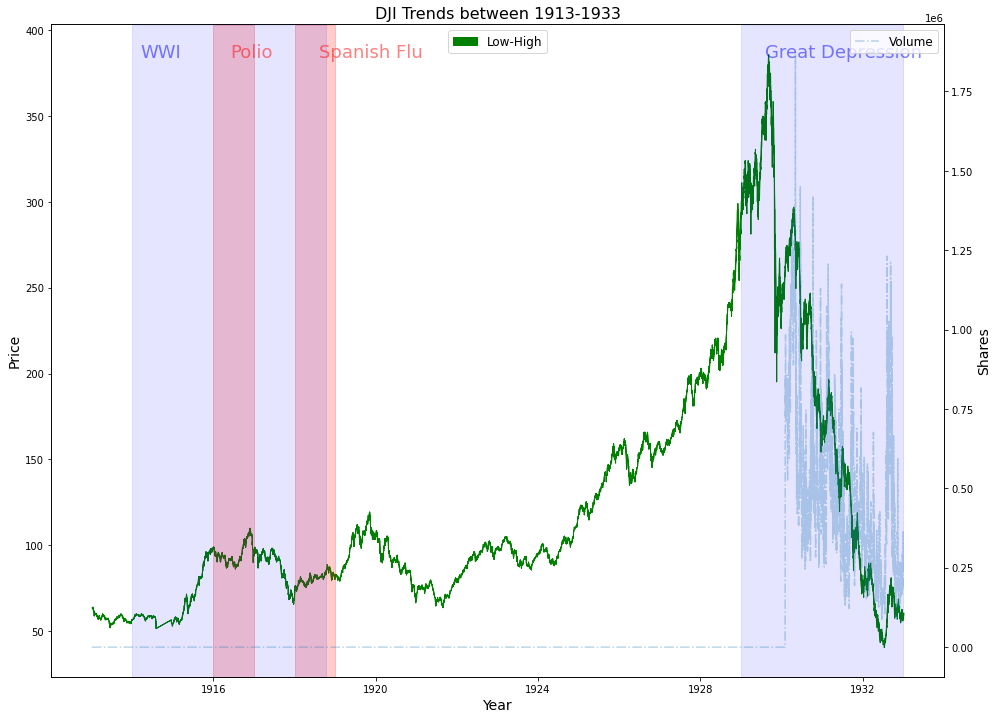

In [0]:
#WWI, Great Depression, Polio, and Spanish Flu

time_window = 20 #years

#Start with 1950 - 1960
start_year = 1913
end_year = start_year+time_window

#Generate years between start and end
years = np.arange(start_year, end_year)

#Filter all rows not in those years
dji_window = dji[dji.index.year.isin(years)]

#Create plot
fig,ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')  #Used for dark mode

#We could use df.plot to plot, but since volume is at a much higher scale,
#do it in matplotlib instead

#If we plot open, close, low and high, they all seem to line up becase the scale
#of the differences between them is much smaller than day to day variations,
#so I'll just plot high and low
ax.fill_between(dji_window.index, dji_window.Low, dji_window.High, label='Low-High', color='g')
plt.legend(loc='upper center', fontsize=12)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Price', fontsize=14)

#Plot the volume on a seperate y-axis because of scale
ax_vol = ax.twinx()
ax_vol.plot(dji_window.Volume, linestyle='-.', label='Volume', alpha=0.3)
ax_vol.set_ylabel('Shares', fontsize=14)
plt.legend(fontsize=12)

#We are interested in Polio
y_min, y_max = ax.get_ylim()
ax.fill_betweenx(np.arange(y_min, y_max),np.datetime64('1916'), np.datetime64('1917'), color='r',alpha=0.2)
ax.text(0.2,0.95, "Polio", fontsize=18, color='r', alpha=0.5, transform=ax.transAxes)
ax.set_ylim(y_min, y_max) #Plotting the area changes the ylims, so reset them

#We are interested in Spanish Flu
y_min, y_max = ax.get_ylim()
ax.fill_betweenx(np.arange(y_min, y_max),np.datetime64('1918'), np.datetime64('1919'), color='r',alpha=0.2)
ax.text(0.3,0.95, "Spanish Flu", fontsize=18, color='r', alpha=0.5, transform=ax.transAxes)
ax.set_ylim(y_min, y_max) #Plotting the area changes the ylims, so reset them

#We are interested in WWI
y_min, y_max = ax.get_ylim()
ax.fill_betweenx(np.arange(y_min, y_max),np.datetime64('1914'), np.datetime64('1918-10-11'), color='b',alpha=0.1)
ax.text(0.1,0.95, "WWI", fontsize=18, color='b', alpha=0.5, transform=ax.transAxes)
ax.set_ylim(y_min, y_max) #Plotting the area changes the ylims, so reset them

#We are interested in the Great Depression
y_min, y_max = ax.get_ylim()
ax.fill_betweenx(np.arange(y_min, y_max),np.datetime64('1929'), np.datetime64('1933'), color='b',alpha=0.1)
ax.text(0.8,0.95, "Great Depression", fontsize=18, color='b', alpha=0.5, transform=ax.transAxes)
ax.set_ylim(y_min, y_max) #Plotting the area changes the ylims, so reset them

plt.title('DJI Trends between %i-%i' %(start_year, end_year), fontsize=16)
plt.savefig('dji_trend_asian_flu.png')
plt.show()

Based on local economic trends during polio and spanish flu there do not seem to be any notable economic decline or increase during these periods. This may be largerly due to the effects of the world war on the economy though I do not know exactly how.

Next we look at SARS beginning in late 2002 and caused by another coronavirus, as well as in comparison to the 2008~2009 recession.

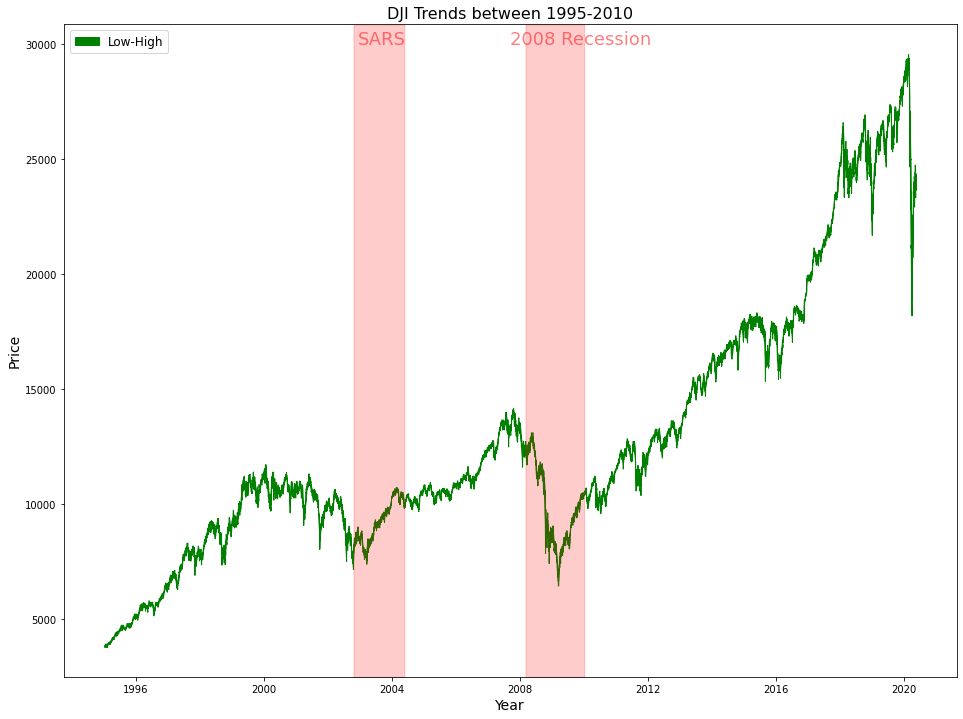

In [0]:
#2008 Recession and SARS

time_window = 15 #years

#Start with 1965 - 1975
start_year = 1995
end_year = start_year+time_window

#Generate years between start and end
years = np.arange(start_year, end_year)

#Filter all rows not in those years
dji_window = dji[dji.index.year >= start_year]

#Create plot
fig,ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')  #Used for dark mode

#We could use df.plot to plot, but since volume is at a much higher scale,
#do it in matplotlib instead

#If we plot open, close, low and high, they all seem to line up becase the scale
#of the differences between them is much smaller than day to day variations,
#so I'll just plot high and low
ax.fill_between(dji_window.index, dji_window.Low, dji_window.High, label='Low-High', color='g')
plt.legend(loc='upper left', fontsize=12)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Price', fontsize=14)

#Plot the volume on a seperate y-axis because of scale
# ax_vol = ax.twinx()
# ax_vol.plot(dji_window.Volume, linestyle='-.', label='Volume', alpha=0.3)
# ax_vol.set_ylabel('Shares', fontsize=14)
# plt.legend(loc=[0.005,0.91],fontsize=12)

#We are interested in late early 2008 and late 2002 for the recession and SARS respectively
y_min, y_max = ax.get_ylim()
ax.fill_betweenx(np.arange(y_min, y_max),np.datetime64('2008-03-01'),np.datetime64('2009-12-31'), color='r',alpha=0.2)
ax.text(0.5,0.97, "2008 Recession", fontsize=18, color='r', alpha=0.5, transform=ax.transAxes)
ax.set_ylim(y_min, y_max) #Plotting the area changes the ylims, so reset them

y_min, y_max = ax.get_ylim()
ax.fill_betweenx(np.arange(y_min, y_max),np.datetime64('2002-10-16'),np.datetime64('2004-05-19'), color='r',alpha=0.2)
ax.text(0.33,0.97, "SARS", fontsize=18, color='r', alpha=0.5, transform=ax.transAxes)
ax.set_ylim(y_min, y_max) #Plotting the area changes the ylims, so reset them

plt.title('DJI Trends between %i-%i' %(start_year, end_year), fontsize=16)
plt.savefig('dji_trend_2008_recession.png')
plt.show()

## Impact of COVID-19 on the Dow and Jones Industrial Average
Now let's look at the data so far on COVID-19 and how the DJI reacted to the pandemic.

According to WHO (https://www.who.int/emergencies/diseases/novel-coronavirus-2019/events-as-they-happen) COVID was first reported on the 31st of December 2019

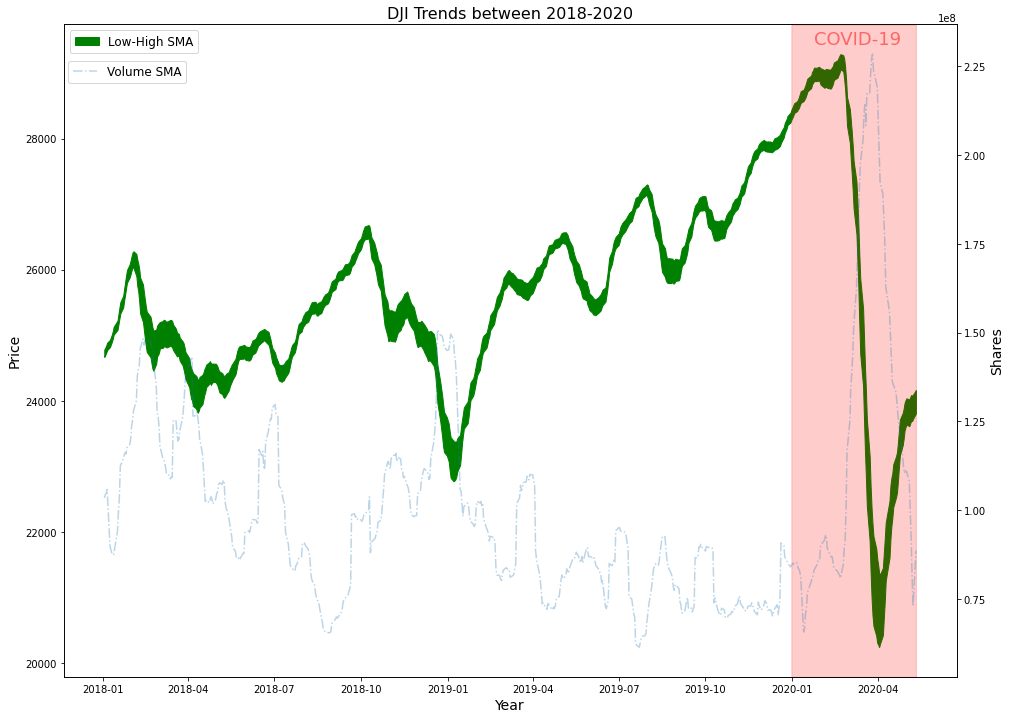

In [0]:
#2019 COVID-19

time_window = 2 #years

#Start with 1965 - 1975
start_year = 2018
end_year = start_year+time_window

#Generate years between start and end
years = np.arange(start_year, end_year)

#Filter all rows not in those years
dji_window = dji[dji.index.year >= start_year]

#Get simple moving averages to smooth the plot
dji_window

#Create plot
fig,ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')  #Used for dark mode

#We could use df.plot to plot, but since volume is at a much higher scale,
#do it in matplotlib instead

#If we plot open, close, low and high, they all seem to line up becase the scale
#of the differences between them is much smaller than day to day variations,
#so I'll just plot high and low
ax.fill_between(dji_window.index, dji_window.Low_SMA, dji_window.High_SMA, label='Low-High SMA', color='g')
plt.legend(loc='upper left', fontsize=12)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Price', fontsize=14)

#Plot the volume on a seperate y-axis because of scale
ax_vol = ax.twinx()
ax_vol.plot(dji_window.Volume_SMA, linestyle='-.', label='Volume SMA', alpha=0.3)
ax_vol.set_ylabel('Shares', fontsize=14)
plt.legend(loc=[0.005,0.91],fontsize=12)

#We are interested in December 31 Onwards
y_min, y_max = ax.get_ylim()
ax.fill_betweenx(np.arange(y_min, y_max),np.datetime64('2019-12-31'),dji_window.index[-1], color='r',alpha=0.2)
ax.text(0.84,0.97, "COVID-19", fontsize=18, color='r', alpha=0.5, transform=ax.transAxes)
ax.set_ylim(y_min, y_max) #Plotting the area changes the ylims, so reset them

plt.title('DJI Trends between %i-%i' %(start_year, end_year), fontsize=16)
plt.savefig('dji_trend_covid19.png')
plt.show()

There is a clear hit to the DJI shortly after COVID was reported. Plotting this alongside case numbers can give insight into when an impact is expected.
Also of note is the quick recovery given the scale shown, which suggests we may have to look at the other pandemics above at a smaller scale to find similar impacts

## Visualizing Daily Cases for COVID-19

Using data from https://ourworldindata.org/grapher/daily-cases-covid-19, I want to see how daily cases in the months leading up to and following when COVID19 was reported affect the DJI.

In [0]:
covid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/daily-cases-covid-19.csv')

In [0]:
#Lets look at the data we have
covid.sample(15)

Entity Code          Date  Daily confirmed cases (cases)
1678         Bahrain  BHR   Feb 3, 2020                              0
12044    Netherlands  NLD  Mar 30, 2020                           1104
948             Asia  NaN  Jan 29, 2020                           1475
14388    Saint Lucia  LCA  Apr 19, 2020                              0
13863          Qatar  QAT  Jan 18, 2020                              0
8552     Isle of Man  IMN  Apr 23, 2020                              0
15468  South America  NaN  Mar 28, 2020                           1263
13950          Qatar  QAT  Apr 18, 2020                            560
4220         Curacao  CUW  Mar 29, 2020                              0
3298          Canada  CAN  Apr 11, 2020                           1385
13733       Portugal  PRT  Mar 10, 2020                              9
14271         Rwanda  RWA  Apr 11, 2020                              5
3851           Congo  COG   Apr 1, 2020                              3
1512      Azerbaijan  AZE  Feb 22, 2020                              0
9469      Kyrgyzstan  KGZ  Mar 22, 2020                              8

In [0]:
#It seems we are dealing with multiple different levels of scale. Lets inspect Entity more closely
covid.Entity.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Asia excl. China', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethio

In [0]:
#I'm interested in the world, so I'll filter the rest out
covid_world = covid[covid.Entity == 'World']

#Entity and Code are useless to us now, so filter those out as well
covid_world = covid_world.loc[:,['Date','Daily confirmed cases (cases)']]
covid_world = covid_world.set_index('Date')

#The column label for cases is too large, rename it
covid_world.columns = ['New_Cases']

#Convert the Date object to datetime
covid_world.index = pd.to_datetime(covid_world.index)

#I am also interested in the total confirmed cases
covid_world['Total_Cases'] = covid_world.New_Cases.cumsum()

covid_world.head(15)

New_Cases  Total_Cases
Date                              
2019-12-31         27           27
2020-01-01          0           27
2020-01-02          0           27
2020-01-03         17           44
2020-01-04          0           44
2020-01-05         15           59
2020-01-06          0           59
2020-01-07          0           59
2020-01-08          0           59
2020-01-09          0           59
2020-01-10          0           59
2020-01-11          0           59
2020-01-12          0           59
2020-01-13          1           60
2020-01-14          0           60

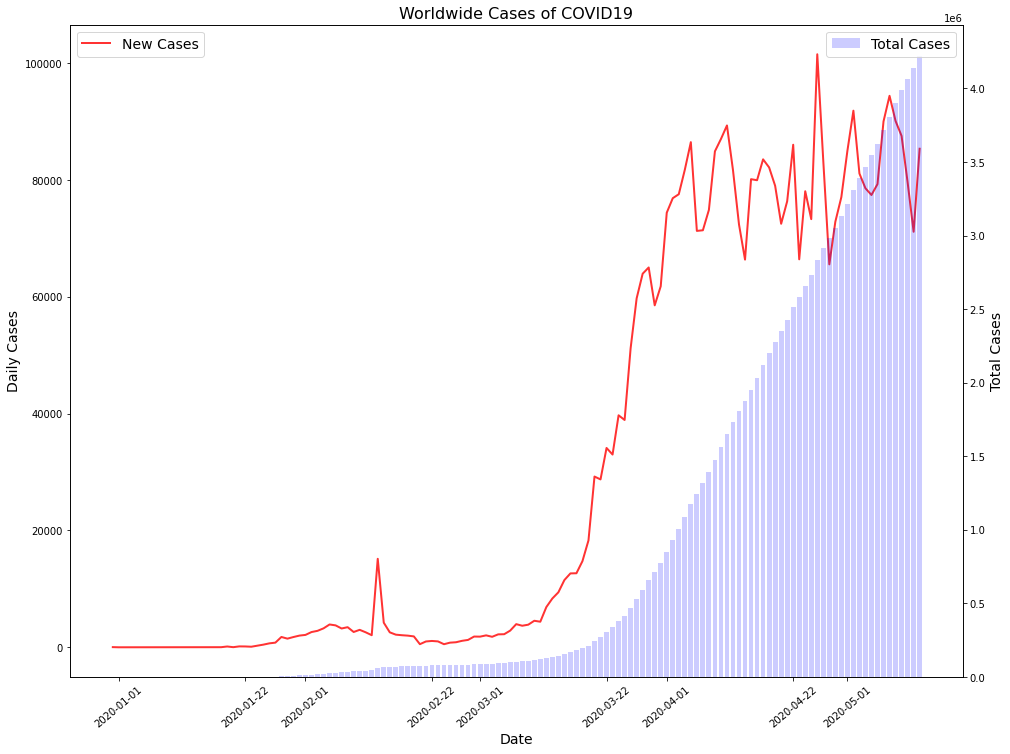

In [0]:
#Lets visualize this data
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')

ax.plot(covid_world.New_Cases, label = 'New Cases', color='r',linewidth=2, alpha = 0.8)
ax.set_ylabel('Daily Cases', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels,rotation=40) #Rotate xlabels to avoid clustering
ax.set_xlabel('Date', fontsize=14)
plt.legend(fontsize=14, loc='upper left')

#Plot total cases as bar plot on different y-axis for scale.
ax_tot = ax.twinx()
ax_tot.bar(covid_world.index,covid_world.Total_Cases, label = 'Total Cases', color='b',alpha = 0.2)
ax_tot.set_ylabel('Total Cases', fontsize=14)
plt.legend(fontsize=14, loc='upper right')

plt.title('Worldwide Cases of COVID19', fontsize=16)
plt.savefig('covid_19_world_cases.png')
plt.show()

## Looking at COVID-19 Cases alongside DJI Trends

We may be able to gain some insight on when the economy started beign impacted by visualizing COVID cases alongside DJI Trends

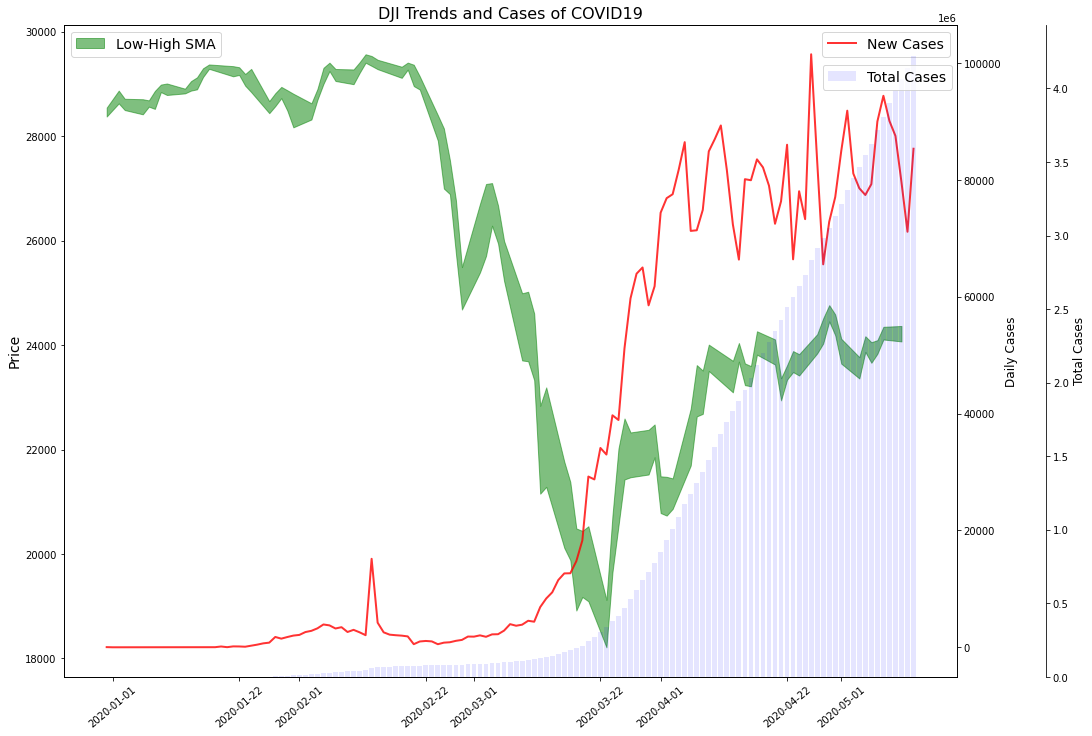

In [0]:
#Get the inital timestamp for our covid data
start_date = covid_world.index[0]

#Filter out data before start date
dji_compare = dji[dji.index >= start_date]

#Visualize
fig, ax_cov = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')

#Start with DJI Trend axis
ax_cov.fill_between(dji_compare.index, dji_compare.Low, dji_compare.High, label='Low-High SMA', color='g', alpha=0.5)
ax_cov.set_ylabel('Price', fontsize=14)
xlabels = ax_cov.get_xticklabels()
ax_cov.set_xticklabels(xlabels,rotation=40) #Rotate xlabels to avoid clustering
plt.legend(fontsize=14, loc='upper left')

#Plot Both Daily and Total cases on different y axis
ax = ax_cov.twinx()
ax.plot(covid_world.New_Cases, label = 'New Cases', color='r',linewidth=2, alpha = 0.8)
ax.set_ylabel('Daily Cases', fontsize=12)
ax.set_xlabel('Date', fontsize=14)
plt.legend(fontsize=14, loc='upper right')

ax_tot = ax_cov.twinx()
ax_tot.spines["right"].set_position(("axes", 1.1))
ax_tot.bar(covid_world.index,covid_world.Total_Cases, label = 'Total Cases', color='b',alpha = 0.1)
ax_tot.set_ylabel('Total Cases', fontsize=12)
plt.legend(loc=(0.85,0.9),fontsize=14)

plt.title('DJI Trends and Cases of COVID19', fontsize=16)
plt.savefig('dji_compare_covid_cases.png')
plt.show()